<a href="https://colab.research.google.com/github/VishweshChaubey/Codesoft/blob/main/airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = "/content/AirQualityUCI.csv"
df = pd.read_csv(file_path, sep=';', decimal=',', engine='python')

In [3]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

In [4]:
df.replace(-200, np.nan, inplace=True)

In [5]:
df.dropna(thresh=10, inplace=True)

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [7]:
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

In [8]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df.dropna(subset=['Datetime'], inplace=True)
df.set_index('Datetime', inplace=True)

In [9]:
df.drop(columns=['Date', 'Time'], inplace=True)


In [10]:
X = df.drop(columns=['CO(GT)'])
y = df['CO(GT)']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [16]:
print("RMSE:", round(rmse, 3))
print("R² Score:", round(r2, 3))

RMSE: 0.482
R² Score: 0.869


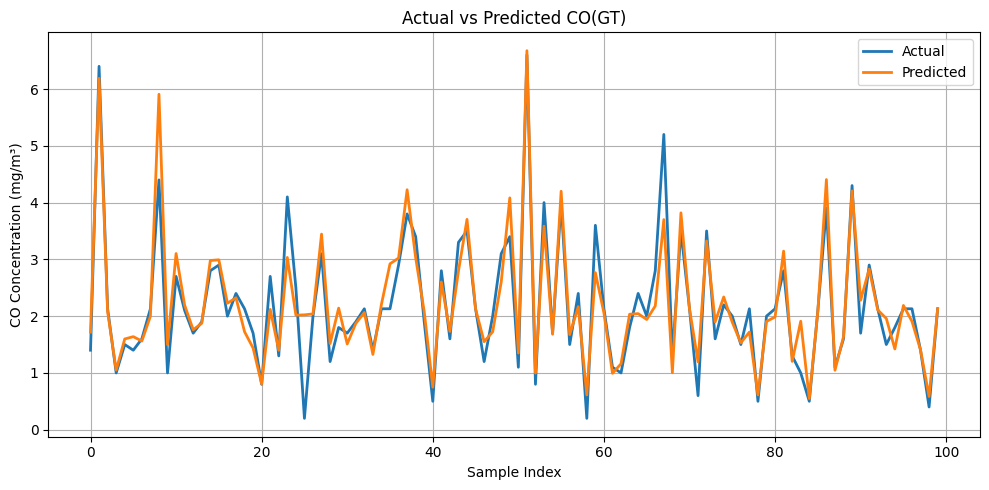

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linewidth=2)
plt.title('Actual vs Predicted CO(GT)')
plt.xlabel('Sample Index')
plt.ylabel('CO Concentration (mg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()